# Statystyka opisowa

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

## Statystyki próbkowe i metody opisu danych jakościowych

## Zadanie - podstawowe statystyki
Zaimplementować klase `Stats`, która posiada metody do wyznaczenia:

a) średniej arytmetycznej,
b) mediany,
c) wariancji,
d) odchylenia standardowego


dla dowolnej danych $X$.

In [ ]:
class Stats:
    
    def __init__(self, vec):
        self.vec = vec
    
    def mean(self):
        return np.mean(self.vec)
    
    def median(self):
        return np.median(self.vec)
    
    def var(self):
        return np.var(self.vec,ddof=1)
    
    def std(self):
        return np.std(self.vec,ddof=1)

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

stats = Stats(a)

In [ ]:
print(stats.mean())
print(stats.median())
print(stats.var())
print(stats.std())

5.5
5.5
9.166666666666666
2.8722813232690143


## Zadanie - boxplot, szereg rozdzielczy, histogram
Firma budowlana zainteresowana jest jakością betonu. Jedną z pożądanych cech jest jego odpowiednia wytrzymałość na ściskanie. Aby sprawdzić, czy beton proponowany przez dostawcę spełnia normy jakości, przebadano 50 próbek i otrzymano następujące wyniki wytrzymałości na ściskanie:
6.2, 16.7, 25.5, 17.5, 14.4, 27.7, 13.2, 21.2, 21.7, 12.1, 11.7, 27.6, 22.3, 22.8, 14.2, 19.1, 22.7, 16.7, 25.2, 24.9, 13.6,  9.7, 18. , 17.9, 26.3, 17.7, 13.9, 17.7, 22.7, 16.7, 18.8, 19.5, 21.7, 21.5, 19. , 14.6, 24.6, 20.9, 20.7, 21. , 18.4, 15.3, 22.1, 26. ,25.4, 14.1, 18.1, 23. , 14.9, 27.3.

a) Obliczyć podstawowe statystyki próbkowe 

b) Sporządzić i opisać wykres skrzynkowy.

c) ***Zbudować szereg rozdzielczy.

d) Narysować histogram liczności.

e) Narysować histogram skumulowanych liczności.

In [ ]:
beton = np.array([6.2, 16.7, 25.5, 17.5, 14.4, 27.7, 13.2, 21.2, 21.7, 
                   12.1, 11.7, 27.6, 22.3, 22.8, 14.2, 19.1, 22.7, 16.7, 
                   25.2, 24.9, 13.6,  9.7, 18. , 17.9, 26.3, 17.7, 13.9, 
                   17.7, 22.7, 16.7, 18.8, 19.5, 21.7, 21.5, 19. , 14.6, 
                   24.6, 20.9, 20.7, 21. , 18.4, 15.3, 22.1, 26. ,25.4, 
                   14.1, 18.1, 23. , 14.9, 27.3])

In [ ]:
#a
st = Stats(beton)
print(f"Mean: {st.mean()}")
print(f"Median: {st.median()}")
print(f"Variance: {st.var()}")
print(f"Standard deviation: {st.std()}")

print(f"Count: {len(beton)}")
print(f"Min: {beton.min()}")
print(f"Max: {beton.max()}")
print(f"Range: {beton.max() - beton.min()}")
print(f"Q1: {np.quantile(beton, .25)}")
print(f"Q2: {np.quantile(beton, .5)}")
print(f"Q3: {np.quantile(beton, .75)}")
print(f"IQR: {np.quantile(beton, .75) - np.quantile(beton, .25)}")

Mean: 19.29
Median: 19.05
Variance: 24.535204081632656
Standard deviation: 4.953302341027919
Count: 50
Min: 6.2
Max: 27.7
Range: 21.5
Q1: 15.65
Q2: 19.05
Q3: 22.7
IQR: 7.049999999999999


In [ ]:
pd.DataFrame(beton).describe()

,0
count,50.000000
mean,19.290000
std,4.953302
min,6.200000
25%,15.650000
50%,19.050000
75%,22.700000
max,27.700000


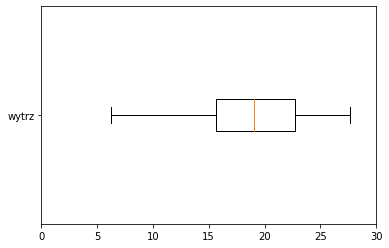

In [ ]:
#b
plt.boxplot(beton,vert = False,labels = ['wytrz'])
plt.xlim(0,30)
plt.show()

In [ ]:
Q1 = np.quantile(beton, .25)
Q3 = np.quantile(beton, .75)
IQR = Q3 - Q1
print(Q1-1.5*IQR,Q3+1.5*IQR)

5.075000000000001 33.275


In [ ]:
#c)
n = beton.size

# wyznaczamy liczbę klas
left_k = 0.75 * np.sqrt(n)
right_k = np.sqrt(n)
print(left_k, right_k) # => k = 6

k = 6

# wyznaczamy długośc klasy
bmin = beton.min()
bmax = beton.max()

d = np.round((bmax - bmin) / k, 2)
print(d)


5.303300858899107 7.0710678118654755
3.58


In [ ]:
# wyznaczamy przedzialy klas
left_bound = np.round(np.arange(bmin, bmax, d)[:k], 2)

intervals = []
n_size = np.zeros(k)

# wyznaczamy szereg rozdzielczy
make_interval = lambda x, y: "[{}, {})".format(x, y)
make_closed_interval = lambda x, y: "[{}, {}]".format(x, y)

for i in range(k-1):
    l, r = left_bound[i], left_bound[i+1]
    intervals.append(make_interval(l, r))
    n_size[i] = np.sum((beton >= l) & (beton < r))
         
l, r = left_bound[k-1], bmax
intervals.append(make_closed_interval(l, r))
n_size[k-1] = np.sum((beton >= l) & (beton <= r))

f = n_size / beton.size
frequency_distribution = pd.DataFrame({'Interval': np.array(intervals), 
                                       'n': n_size, 'f': f, 
                                      'cn': np.cumsum(n_size), 'cf': np.cumsum(f)})
frequency_distribution


,Interval,n,f,cn,cf
0,"[6.2, 9.78)",2.0,0.04,2.0,0.04
1,"[9.78, 13.36)",3.0,0.06,5.0,0.10
2,"[13.36, 16.94)",11.0,0.22,16.0,0.32
3,"[16.94, 20.52)",11.0,0.22,27.0,0.54
4,"[20.52, 24.1)",13.0,0.26,40.0,0.80
5,"[24.1, 27.7]",10.0,0.20,50.0,1.00


(array([ 2.,  3., 11., 11., 13., 10.]), array([ 6.2       ,  9.78333333, 13.36666667, 16.95      , 20.53333333,
       24.11666667, 27.7       ]), <a list of 6 Patch objects>)


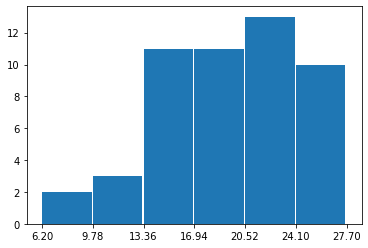

In [ ]:
#d)
hist_data = plt.hist(beton, bins=k, width=3.5, align='mid')
plt.xticks(list(left_bound) + [bmax], rotation=0)
print(hist_data)


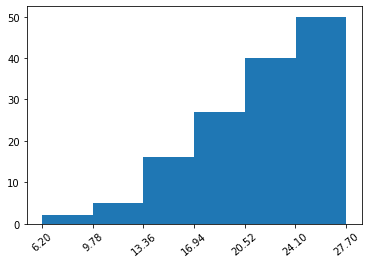

In [ ]:
plt.hist(beton, bins=k, cumulative = True)
plt.xticks(list(left_bound) + [bmax], rotation=40)
plt.show()


## Zadanie - porównanie średniej arytmetycznej i mediany
Wczytaj dane `stats1.csv` opisujące pomiar pewnej długości przez dwóch różnych ekspertów. Porównaj ich rozkład oraz statystyki próbkowe.

In [ ]:
stats1 = pd.read_csv('stats1.csv')
stats1.head(5)

,x,y
0,10.968388,10.481487
1,11.035494,13.211230
2,3.805479,3.954873
3,3.402634,5.367647
4,7.527793,7.234025


In [ ]:
pd.DataFrame({'x':stats1.x,'y':stats1.y}).describe()

,x,y
count,1000.000000,1000.000000
mean,4.956962,6.523673
std,3.165879,28.577406
min,0.289994,-1.198420
25%,2.660315,2.736644
50%,4.414328,4.530463
75%,6.575814,6.822966
max,27.866537,808.876344


## Zadanie - współczynnik rozproszenia
Wczytaj dane `stats2.csv` zawierające pomiary wagi słoni i myszy w pewnym zoo (w gramach). Wyznacz statystyki próbkowe i oceń, która próbka, opisująca wagę słoni, czy opisująca wagę myszy, ma większe rozproszenie wartości.

In [ ]:
weight = pd.read_csv('stats2.csv')
weight.head(5)

,elephant,mouse
0,3883240.0,21.0
1,4046450.0,18.0
2,4152119.0,22.0
3,2578306.0,23.0
4,3597481.0,25.0


In [ ]:
s = weight.describe()
print(s)

           elephant       mouse
count  1.000000e+02  100.000000
mean   4.017328e+06   20.470000
std    4.998078e+05    2.886594
min    2.578306e+06   13.000000
25%    3.685120e+06   19.000000
50%    4.046994e+06   20.000000
75%    4.380402e+06   22.000000
max    5.246947e+06   27.000000


**Uwaga**: W sytuacji, gdy chcemy porównanć rozrzut dwóch lub więcej prób, nieraz wygodniej jest skorzystać ze względnej miary rozproszenia - **współczynnika rozproszenia**:
$$
V = \frac{S}{\overline{X}}\cdot 100\%.
$$

In [ ]:
s.loc['std']/s.loc['mean']*100

elephant    12.441300
mouse       14.101582
dtype: float64

## Miara korelacji — współczynnik korelacji Pearsona

W przypadku jednoczesnego badania dwóch cech pewnej populacji naszą próbą jest ciąg par $$(X_1, Y_1),\ldots,(X_n, Y_n),$$ gdzie $X_i$ oraz $Y_i$ oznaczają, odpowiednio, wartości pierwszej i drugiej cechy przyjmowane przez $i$-ty element próby.

Wówczas **współczynnik korelacji Pearsona** jest dany wzorem
\begin{equation*}
    r = \frac{\sum_{i=1}^n(X_i-\overline{X})(Y_i-\overline{Y})}{\sqrt{\sum_{i=1}^n(X_i-\overline{X})^2\sum_{i=1}^n(Y_i-\overline{Y})^2}}.
\end{equation*}

In [ ]:
from scipy import stats

In [ ]:
?np.corrcoef

## Zadanie - korelacja liniowa
Wygeneruj próbkę $X$ z wybranego przez siebie rozkładu i oblicz wartość elementów próbki $Y$ zgodnie ze wzorem

a) $Y = X$,

b) $Y = 5X$,

c) $Y = -5X$,

d) $Y = X^2$,

f) $Y = \exp(X)$,

g) $Y = \sin(X)$, 

a następnie oblicz współczynnik korelacji pomiędzy zmiennymi $X$ i $Y$.

(array([   4.,   24.,  192.,  831., 2161., 3038., 2407., 1056.,  252.,
          35.]),
 array([-4.35128301, -3.57169302, -2.79210303, -2.01251304, -1.23292305,
        -0.45333307,  0.32625692,  1.10584691,  1.8854369 ,  2.66502689,
         3.44461688]),
 <a list of 10 Patch objects>)

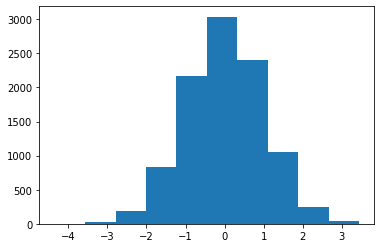

In [ ]:
x = stats.norm.rvs(size = 10000,loc=  0, scale = 1)
plt.hist(x)

In [ ]:
ya = x
yb = 5*x
yc = -5*x
yd = x**2
yf = np.exp(x)
yg = np.sin(x)

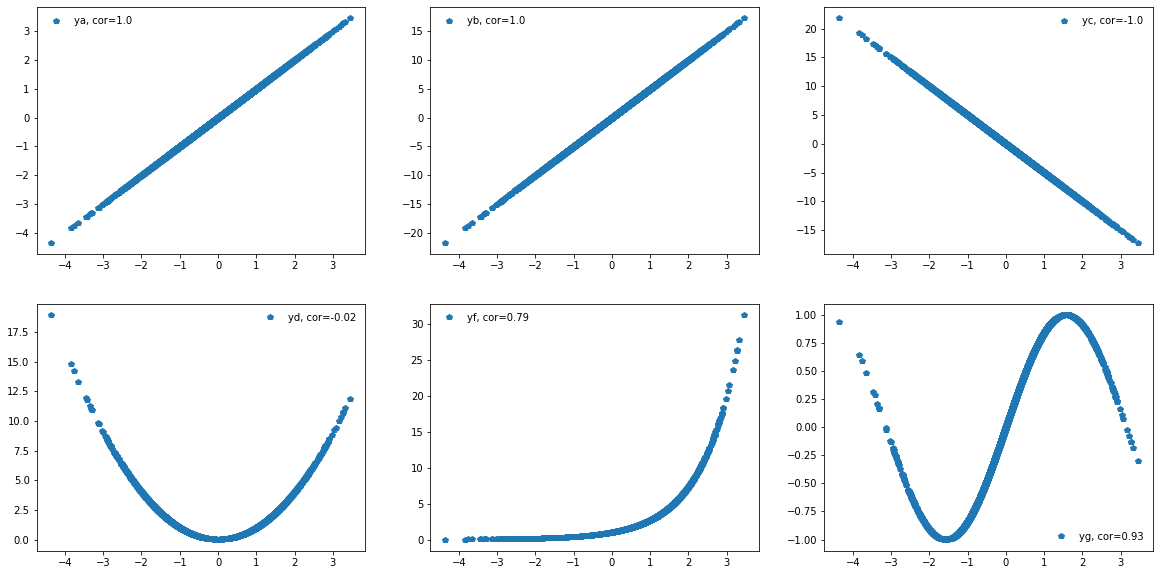

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0, 0].plot(x, ya, "p", label="ya, cor={}".format(np.round(np.corrcoef(x, ya)[0, 1], 2)))
ax[0, 0].legend(loc='best', frameon=False)
ax[0, 1].plot(x, yb, "p", label="yb, cor={}".format(np.round(np.corrcoef(x, yb)[0, 1], 2)))
ax[0, 1].legend(loc='best', frameon=False)
ax[0, 2].plot(x, yc, "p", label="yc, cor={}".format(np.round(np.corrcoef(x, yc)[0, 1], 2)))
ax[0, 2].legend(loc='best', frameon=False)
ax[1, 0].plot(x, yd, "p", label="yd, cor={}".format(np.round(np.corrcoef(x, yd)[0, 1], 2)))
ax[1, 0].legend(loc='best', frameon=False)
ax[1, 1].plot(x, yf, "p", label="yf, cor={}".format(np.round(np.corrcoef(x, yf)[0, 1], 2)))
ax[1, 1].legend(loc='best', frameon=False)
ax[1, 2].plot(x, yg, "p", label="yg, cor={}".format(np.round(np.corrcoef(x, yg)[0, 1], 2)))
ax[1, 2].legend(loc='best', frameon=False)

## Zadanie - korelacja liniowa
Wygeneruj $n$ par niezależnych zmiennych losowych, dla każdej z nich wyznacz współczynnik korelacji, a następnie sprawdź rozkład otrzymanych współczynników.

## Zadanie - do domu
Wczytaj zbiór danych `boston_prediction.csv`, który zawiera dane z predykcji dwóch modeli cen mieszkań w Bostonie (więcej na temat zbioru, na podstawie, którego zbudowano modele możesz przeczytać, np. https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html).

Oceń jakość predykcji obu modeli: policz średnią, medianę, kwantyl rzędu 90% oraz odchylenie standardowe dla błędu bezwzględnego i względnego oraz korelację wartości przewidywanych z prawdziwymi. Wyciągnąć wnioski na temat działania obu modeli.

**Wskazówka**:

**Błąd bezwzględny** liczymy ze wzoru:
$$
\Delta x = |x-x_0|.
$$

**Błąd względny** liczymy ze wzoru:
$$
\delta = \frac{\Delta x}{x}.
$$

Oznaczenia: $x$ - wartość dokładna, $x_0$ - wartość zmierzona.

In [ ]:
# https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html
# from sklearn.datasets import load_boston
# X, y = load_boston(return_X_y=True)

In [ ]:
boston_pred = pd.read_csv("../data/boston_prediction.csv")
boston_pred.head(5)